In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

### CSCI 447 Fall 2023 Kaggle Competition

In [19]:
train = pd.read_csv('data/kaggle_train.csv')
test = pd.read_csv('data/kaggle_test.csv')
# example = pd.read_csv('data/kaggle_example_submission.csv')

In [ ]:
train

In [ ]:
# show features that correlate most with target
train.corr()['target'].sort_values(ascending=False)

---

In [ ]:
# # Remove features that correlate weakly with target (run this to do that)
# train_correlated = train.copy()
# train_correlated = train_correlated.drop(['f14', 'f13','f11'], axis=1)

# train = train_correlated

In [20]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [21]:
# get column names to re add after scaling
train_cols = train.columns
test_cols = test.columns

# get target col to re add after scaling
train_target = train['target']

# get id col to re add after scaling
train_id = train['id']
test_id = test['id']

In [22]:
# standardize data
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler2 = StandardScaler()
train = scaler1.fit_transform(train)
test = scaler2.fit_transform(test)
train

array([[-1.72772608, -0.68405502, -0.85383064, ..., -1.97057171,
        -1.30887552, -1.62715646],
       [-1.7190658 ,  1.22919767,  0.98745524, ..., -0.73044123,
         0.52500482,  0.85025984],
       [-1.71040552, -0.79846207, -0.32310424, ...,  0.06533439,
         0.16182802,  0.37761826],
       ...,
       [ 1.71040552, -1.28426824,  0.39348869, ...,  0.81660053,
        -0.47386709,  0.05673068],
       [ 1.7190658 , -0.19965149,  0.1313386 , ...,  0.08639641,
         0.45044163,  1.17357355],
       [ 1.72772608, -1.80418649, -1.8107233 , ..., -0.12728563,
         0.1111803 ,  0.01364026]])

In [24]:
# add column names back
train = pd.DataFrame(train, columns=train_cols)
test = pd.DataFrame(test, columns=test_cols)
# add target col back
train['target'] = train_target
# add id col back
train['id'] = train_id
test['id'] = test_id
train.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,target
count,400.000000,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,400.000000
mean,200.500000,-2.442491e-16,-2.664535e-17,-9.325873e-17,1.776357e-17,1.441891e-13,3.446132e-15,1.154632e-16,7.993606e-17,2.131628e-16,-3.996803e-17,-2.775558e-17,3.552714e-17,4.440892e-17,-1.776357e-17,-3.552714e-16,2.664535e-17,2.109424e-16,-3.885781e-17,3.286260e-16,-1.998401e-17,-1.130048
std,115.614301,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,10.848223
min,1.000000,-2.864914e+00,-2.912312e+00,-3.177173e+00,-2.873320e+00,-2.676293e+00,-2.724290e+00,-2.992946e+00,-3.016102e+00,-2.969560e+00,-2.688761e+00,-2.638690e+00,-3.057853e+00,-2.630710e+00,-3.277049e+00,-3.110809e+00,-2.835288e+00,-2.782867e+00,-3.640569e+00,-3.250875e+00,-2.795966e+00,-56.422845
25%,100.750000,-6.232837e-01,-6.700640e-01,-6.530525e-01,-6.908133e-01,-6.433004e-01,-6.785341e-01,-6.749836e-01,-7.120203e-01,-6.781689e-01,-6.638184e-01,-6.957960e-01,-6.316507e-01,-6.894649e-01,-6.913151e-01,-6.466926e-01,-7.738073e-01,-6.584388e-01,-6.680523e-01,-6.817377e-01,-7.561603e-01,-5.335921
50%,200.500000,8.663099e-02,-1.647919e-04,2.341005e-02,-8.385286e-02,3.327371e-02,-4.316262e-02,-3.071142e-02,4.537892e-02,-6.650145e-02,-8.217790e-03,-4.224086e-02,2.707950e-02,2.211142e-02,1.832381e-02,-7.695655e-02,-3.701459e-02,1.887805e-02,-5.778016e-03,4.212782e-02,-3.483378e-02,-0.510613
75%,300.250000,6.252322e-01,6.858950e-01,6.559679e-01,6.646559e-01,7.166966e-01,7.049591e-01,6.514258e-01,7.187826e-01,6.918194e-01,6.877310e-01,6.875754e-01,7.003019e-01,6.038212e-01,7.098891e-01,6.905250e-01,7.293493e-01,6.730331e-01,6.780294e-01,6.997966e-01,6.915907e-01,3.934202
max,400.000000,2.950914e+00,2.518933e+00,2.762405e+00,2.685094e+00,3.038023e+00,2.621608e+00,2.847311e+00,2.739400e+00,2.825830e+00,3.399690e+00,2.843222e+00,2.868617e+00,3.021595e+00,2.532323e+00,2.753429e+00,3.098662e+00,3.140459e+00,2.996974e+00,2.464176e+00,2.697927e+00,36.101080


#### XGBoost:

In [25]:
# split data into train and test sets
X = train.drop(['target', 'id'], axis=1)
y = train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [26]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('RMSE:', np.sqrt(mse))

RMSE: 5.083759023990873


In [ ]:
# # grid search on xgb
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# params = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [1, 2, 3, 4, 5],
#     'min_child_weight': [1, 2, 3],
#     'gamma': [0, 0.1, 0.2],
#     'subsample': [0.5, 0.75, 1],
#     'colsample_bytree': [0.5, 0.75, 1],
#     'reg_alpha': [0, 0.1, 0.2],
#     'reg_lambda': [0, 0.1, 0.2]
# }
# grid = GridSearchCV(estimator=xgb, param_grid=params, scoring='neg_mean_squared_error', cv=5, verbose=1)
# # grid = RandomizedSearchCV(estimator=xgb, param_distributions=params, scoring='neg_mean_squared_error', cv=5, verbose=1)
# grid.fit(X_train, y_train)
# print(grid.best_params_)
# print(grid.best_score_)
# best_xgb = grid.best_estimator_
# y_pred = best_xgb.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print('MSE:', mse)

In [27]:
xgb_best_so_far = XGBRegressor(n_estimators=500, learning_rate=0.2, max_depth=1, min_child_weight=1, gamma=0.1, random_state=42)
xgb_best_so_far.fit(X_train, y_train)
y_pred = xgb_best_so_far.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('RMSE:', np.sqrt(mse))

RMSE: 2.421711100857374


#### FEATURE ENGINEERING:

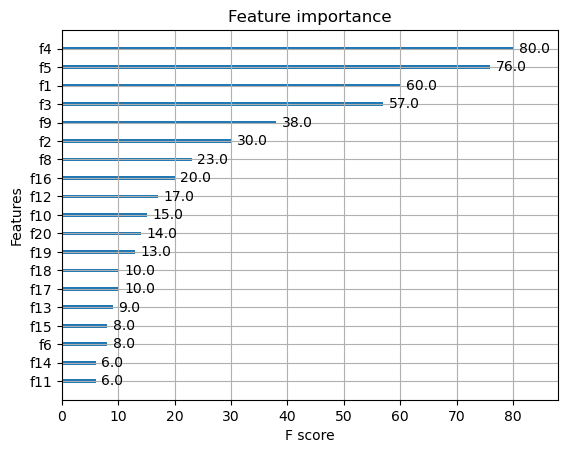

In [28]:
# find most important features
from xgboost import plot_importance
plot_importance(xgb_best_so_far)
plt.show()

In [29]:
train_reduced = train[['f4','f5','f1','f3','target']]
X = train_reduced.drop(['target'], axis=1)
y = train_reduced['target']

X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_best_so_far.fit(X_train_reduced, y_train_reduced)
y_pred = xgb_best_so_far.predict(X_test_reduced)
mse = mean_squared_error(y_test_reduced, y_pred)
print('RMSE:', np.sqrt(mse))
print('MSE:', mse)

RMSE: 1.9698885792473488
MSE: 3.8804610146491383


In [ ]:
# plot predictions vs actual
plt.scatter(y_test_reduced, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [30]:
# predict test set and save to csv with ID, target
test_reduced = test[['id', 'f4','f5','f1','f3']]
test_reduced = test_reduced.drop(['id'], axis=1)
predictions = xgb_best_so_far.predict(test_reduced)
predictions = pd.DataFrame(predictions, columns=['target'])
predictions = pd.concat([test, predictions], axis=1)
# predictions = predictions[['target']]
predictions = predictions[['id', 'target']]
predictions

,id,target
0,401,-37.279144
1,402,-8.643074
2,403,-0.516774
3,404,-4.730848
4,405,2.951321
...,...,...
795,1196,1.107090
796,1197,1.066249
797,1198,21.981838
798,1199,-0.164947


In [ ]:
# drop the 2nd column using its id
predictions = predictions.drop([predictions.index[1]])
predictions

In [ ]:
predictions.to_csv('data/kaggle_submission_bova_4.csv', index=False)

---

## Neural Network

In [ ]:
# # tensorflow regression neural network
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras import regularizers

# # split data into train and test sets
# X = train.drop(['target', 'id'], axis=1)
# y = train['target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# model = keras.Sequential([
#     layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
#     layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
#     layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
#     layers.Dense(1)
# ])

# model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=1)

# # plot mse
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model MSE')
# plt.ylabel('MSE')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper right')
# plt.show()